In [2]:
DPI = 120
IMG_PATH_PREFIX = 'writeup/images/'

# Cropped dataset sample

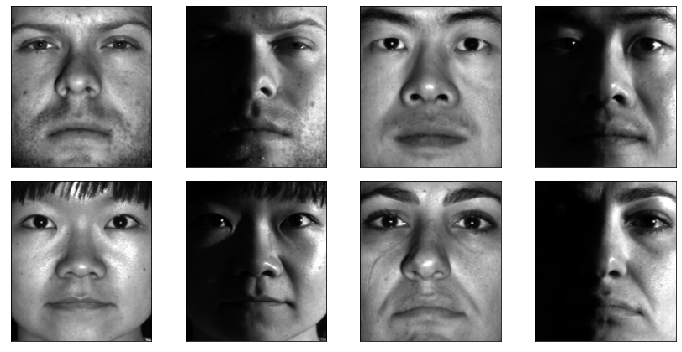

In [3]:
from data_loader import load_cropped_image, load_uncropped_image, get_gender_train_matrix, \
  Lighting, get_all_cropped_matrix
import data_loader
from image_util import show_image
import matplotlib.pyplot as plt
import image_util
import core
import numpy as np

# The first row are two males, second row are two females
sample_ids = [[1,2], [5,15]]

fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (10,5))

# plot male samples
for sample_row in range(2):
  for sample_col in range(2):
    person_id = sample_ids[sample_row][sample_col]
    bright_img = load_cropped_image(person_id, Lighting.BRIGHT)
    left_dark_img = load_cropped_image(person_id, Lighting.LEFT_DARK)
    show_image(axes[sample_row][sample_col * 2], bright_img)
    show_image(axes[sample_row][sample_col * 2 + 1], left_dark_img)

fig.tight_layout()
fig.savefig(IMG_PATH_PREFIX + 'cropped_samples.png', format='png', dpi=DPI)

# Downsampling example

Shape before and after rescaling: (192, 168) -> (38, 34)


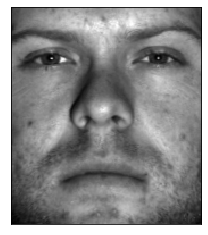

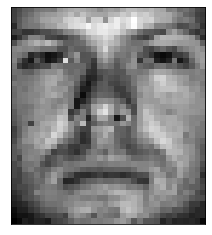

In [4]:
from skimage.transform import rescale

person_id = 1
img = load_cropped_image(person_id, Lighting.BRIGHT)
img_rescaled = rescale(img, 0.20, anti_aliasing=False)
show_image(None, img)
show_image(None, img_rescaled)
print(f"Shape before and after rescaling: {img.shape} -> {img_rescaled.shape}")

# SVD analysis on just bright face

In [4]:
def perform_svd_analysis(images_mat, image_shape, ranks_to_reconstruct_with, file_prefix):
  avg_face = images_mat.mean(axis = 1)
  avg_removed_mat =  (images_mat.T - avg_face).T
  u, s, vh = np.linalg.svd(avg_removed_mat, full_matrices = False) 
  
  # Average face.
  fig, ax = plt.subplots(figsize = (5, 5))
  show_image(ax, image_util.vector_to_img(avg_face, image_shape))
  fig.tight_layout()
  fig.savefig(IMG_PATH_PREFIX + file_prefix + '_avgface.png', format='png', dpi=DPI)
  
  # Top 4 eigenfaces
  fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (10, 2))
  for i in range(4):
    show_image(axes[i], image_util.vector_to_img(u[:,i], image_shape))
  fig.tight_layout()
  fig.savefig(IMG_PATH_PREFIX + file_prefix + '_topeigens.png', format='png', dpi=DPI)
    
  fig = core.plot_energy_from_singular_values(avg_removed_mat)
  fig.tight_layout()
  fig.savefig(IMG_PATH_PREFIX + file_prefix + '_energy.png', format='png', dpi=DPI)
  
  # 4 eigenfaces after the 90 energy mark. I'm assuming ranks contains 90 energy mark at index 1.
  fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (10, 2))
  for i in range(4): 
    show_image(axes[i], image_util.vector_to_img(u[:,ranks_to_reconstruct_with[1]+i], image_shape))
  fig.tight_layout()
  fig.savefig(IMG_PATH_PREFIX + file_prefix + '_90eigens.png', format='png', dpi=DPI)
  
  # Reconstruction with various ranks
  person_id = 0
  fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (10, 2))
  for i, rank in enumerate(ranks_to_reconstruct_with):
    recon = image_util.get_reconstructed_face(u, rank=rank, original_vec=avg_removed_mat[:,person_id])
    show_image(axes[i], image_util.vector_to_img(recon + avg_face, image_shape))
  fig.tight_layout()
  fig.savefig(IMG_PATH_PREFIX + file_prefix + '_recon.png', format='png', dpi=DPI)
  

In [5]:
train_mat = get_gender_train_matrix()
#perform_svd_analysis(train_mat, data_loader.CROPPED_IMG_SHAPE, [1,16,22,29])

# Uncropped dataset sample

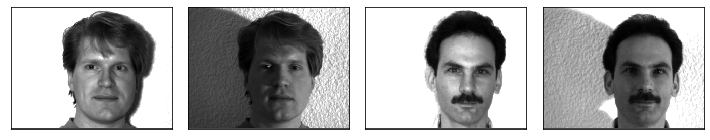

In [7]:
# Sample IDs to visualize
person_ids = [1,2]

fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (10,2))

# plot male samples
for i, person_id in enumerate(person_ids):
    bright_img = load_uncropped_image(person_id, Lighting.BRIGHT)
    left_dark_img = load_uncropped_image(person_id, Lighting.LEFT_DARK)
    show_image(axes[i * 2], bright_img)
    show_image(axes[i * 2 + 1], left_dark_img)
    
fig.tight_layout()
fig.savefig(IMG_PATH_PREFIX + 'uncropped_samples.png', format='png', dpi=DPI)

In [7]:
def get_uncropped_dataset_matrix():
  imgs = [image_util.img_to_vector(load_uncropped_image(person_id, Lighting.BRIGHT)) \
          for person_id in range(1,16)]
  return image_util.imgs_to_matrix(imgs)

In [8]:
uncropped_matrix = get_uncropped_dataset_matrix()

In [9]:
uncropped_matrix.shape

(77760, 15)

In [10]:
# perform_svd_analysis(uncropped_matrix, data_loader.UNCROPPED_IMG_SHAPE, [1,9,12,15])

# SVD analysis on all lighting data

(32256, 2432)
Need 22 modes to cover 90 energy
Need 62 modes to cover 95 energy
Need 295 modes to cover 99 energy
Need 1211 modes to cover 99.9 energy


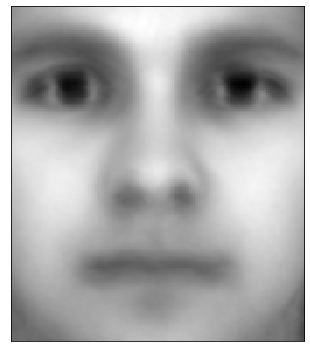

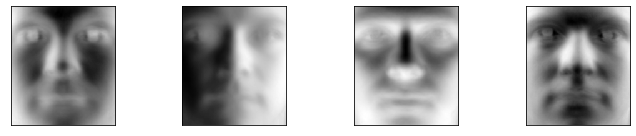

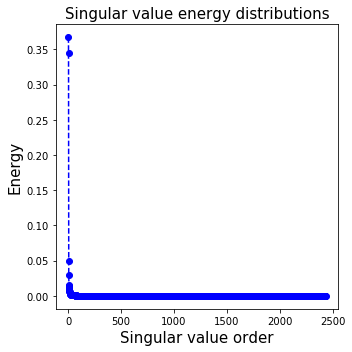

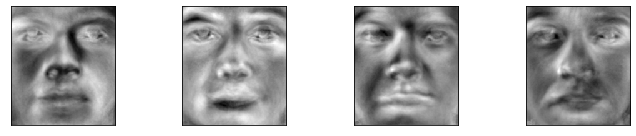

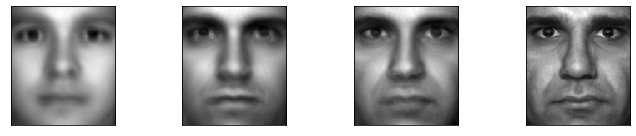

In [11]:
all_cropped_mat = data_loader.get_all_cropped_matrix()
print(all_cropped_mat.shape)
perform_svd_analysis(all_cropped_mat, data_loader.CROPPED_IMG_SHAPE, [1,22,62,295], "cropped")

(77760, 165)
Need 26 modes to cover 90 energy
Need 50 modes to cover 95 energy
Need 106 modes to cover 99 energy
Need 143 modes to cover 99.9 energy


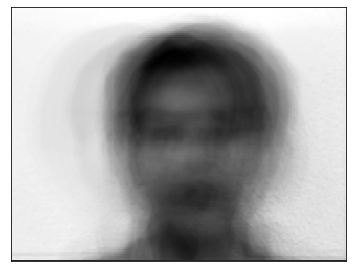

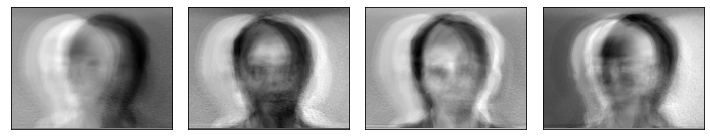

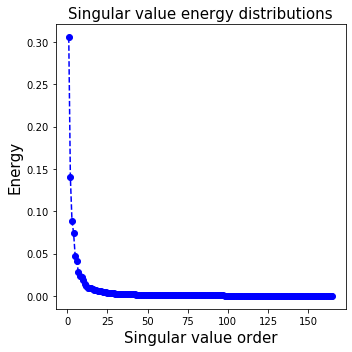

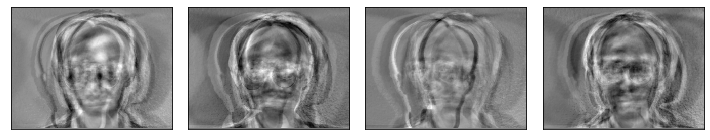

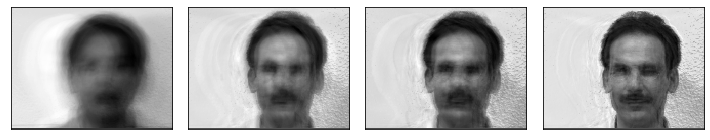

In [12]:
all_uncropped_mat = data_loader.get_all_uncropped_matrix()
print(all_uncropped_mat.shape)
perform_svd_analysis(all_uncropped_mat, data_loader.UNCROPPED_IMG_SHAPE, [1,26,50,106], "uncropped")